<a href="https://colab.research.google.com/github/imceballos/LogisticRegression/blob/master/richclub_pqualities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_rc_quality_gt = pd.read_excel("df_richclub_quality_gt.xlsx")
df_rc_quality_gcp = pd.read_excel("df_richclub_quality_gcp.xlsx")
df_rc_quality_gfilt = pd.read_excel("df_richclub_quality_gfilt.xlsx")

In [126]:
df_filtered_conn = pd.read_excel("filtered_connections_2009_2019.xlsx")

In [127]:
df_filtered_conn.head()

,Unnamed: 0,conn_1,conn_2
0,0,o0,o1
1,1,o2,o79
2,2,o2,o161
3,3,o2,o568
4,4,o2,o4716


In [128]:
B_filtered = nx.Graph()
B_filtered.add_edges_from(df_filtered_conn[["conn_1","conn_2"]].values.tolist())

In [129]:
nx.info(B_filtered)

'Graph with 1138 nodes and 1104 edges'

In [ ]:
df_rc_quality_gt.head()

,Unnamed: 0,organization,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,name,degree,rich_club,rich_club_norm
0,0,o7003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A.S.S.,4,0.003884,0.974938
1,1,o6382,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACADEMIA NACIONAL DE LA LENGUA MAPUCHE,4,0.003884,0.974938
2,2,o3984,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCIÓN FEMINISTA FLUOR,4,0.003884,0.974938
3,3,o6232,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFDD - TALCA,4,0.003884,0.974938
4,4,o489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFUCOM,4,0.003884,0.974938


In [ ]:
df_rc_quality_gt.sort_values('degree', ascending=False)

,Unnamed: 0,organization,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,name,degree,rich_club,rich_club_norm
10707,10707,o67,4954.906433,5.032164,0.083333,0.377193,0.070175,0.000000,0.0,0.000000,CUT,450,NaN,NaN
10677,10677,o96,3032.138393,2.467634,0.081473,0.161830,0.045759,0.000000,0.0,0.001116,ANEF,440,0.000000,0.000000
10700,10700,o79,4244.522609,3.208696,0.083478,0.200870,0.014783,0.001739,0.0,0.000000,COLEGIO DE PROFESORES,370,0.333333,0.031931
10704,10704,o263,9278.374245,12.845070,0.162978,0.899396,0.108652,0.004024,0.0,0.002012,CONFECH,244,0.500000,0.059763
10721,10721,o84,432.598592,0.771127,0.007042,0.000000,0.007042,0.000000,0.0,0.000000,FENATS,118,0.600000,0.096344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,4185,o4438,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,RECUPERACCIÓN COMUNITARIA,0,0.000146,1.000092
4186,4186,o5499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,RED CHILENA CONTRA LA NO VIOLENCIA,0,0.000146,1.000092
4187,4187,o4738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,RED CHILENA CONTRA LA VIOLENCIA CONTRA LA MUJER,0,0.000146,1.000092
4188,4188,o9370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,RED CHILENA CONTRA LA VIOLENCIA CONTRA LAS MUJ...,0,0.000146,1.000092


In [ ]:
degrees_gt = df_rc_quality_gt["degree"].tolist()
richclub_gt = df_rc_quality_gt["rich_club_norm"].tolist()

degrees_gcp = df_rc_quality_gcp["degree"].tolist()
richclub_gcp = df_rc_quality_gcp["rich_club_norm"].tolist()

degrees_gfilt = df_rc_quality_gfilt["degree"].tolist()
richclub_gfilt = df_rc_quality_gfilt["rich_club_norm"].tolist()

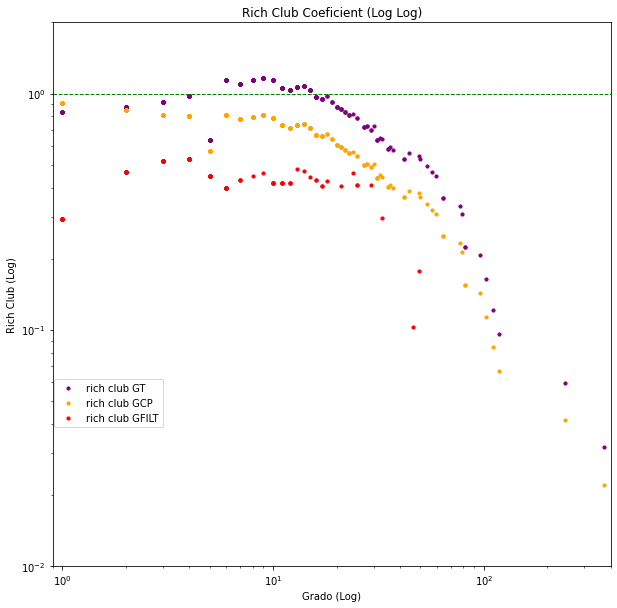

In [ ]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(degrees_gt,richclub_gt, s=10, color='purple',label='rich club GT')
ax.scatter(degrees_gcp,richclub_gcp, s=10, color='orange',label='rich club GCP')
ax.scatter(degrees_gfilt,richclub_gfilt, s=10, color='red',label='rich club GFILT')

ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Rich Club Coeficient (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)

plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.show()

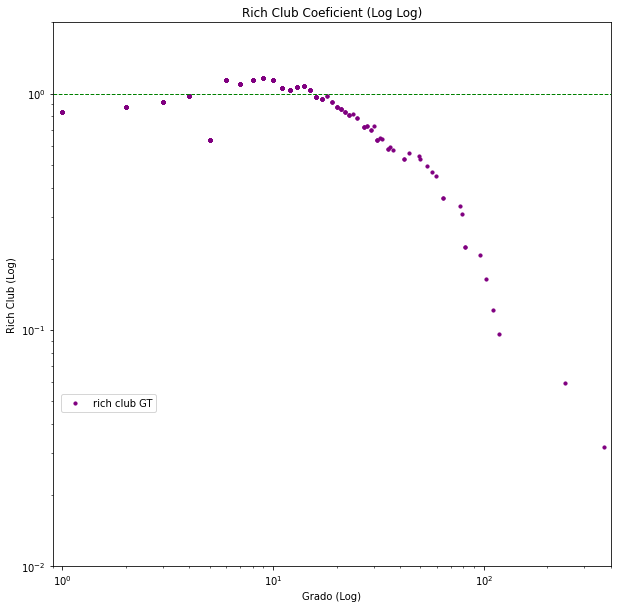

In [ ]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(degrees_gt,richclub_gt, s=10, color='purple',label='rich club GT')

ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Rich Club Coeficient (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)

plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.show()

<h3>Agrupaciòn por medio de groupby, uso de mean en GT</h3




In [ ]:
df_rc_quality_gt = df_rc_quality_gt.drop(columns='Unnamed: 0')
df_rc_quality_gcp = df_rc_quality_gcp.drop(columns='Unnamed: 0')
df_rc_quality_gfilt = df_rc_quality_gfilt.drop(columns='Unnamed: 0')

In [ ]:
df_rc_quality_gt.head()

,organization,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,name,degree,rich_club,rich_club_norm
0,o7003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A.S.S.,4,0.003884,0.974938
1,o6382,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACADEMIA NACIONAL DE LA LENGUA MAPUCHE,4,0.003884,0.974938
2,o3984,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCIÓN FEMINISTA FLUOR,4,0.003884,0.974938
3,o6232,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFDD - TALCA,4,0.003884,0.974938
4,o489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFUCOM,4,0.003884,0.974938


In [ ]:
df_rc_quality_gt_grouped1 = df_rc_quality_gt.groupby('degree').mean()
df_rc_quality_gcp_grouped1 = df_rc_quality_gcp.groupby('degree').mean()
df_rc_quality_gfilt_grouped1 = df_rc_quality_gfilt.groupby('degree').mean()

In [ ]:
degrees_gt_grouped1 = df_rc_quality_gt_grouped1.index.tolist()
rc_gt_grouped1 = df_rc_quality_gt_grouped1['rich_club_norm'].tolist()
size_gt_grouped1_p11 = df_rc_quality_gt_grouped1['p11'].tolist()
size_gt_grouped1_p23 = df_rc_quality_gt_grouped1['p23'].tolist()
size_gt_grouped1_p26a = df_rc_quality_gt_grouped1['p26a'].tolist()
size_gt_grouped1_p26c = df_rc_quality_gt_grouped1['p26c'].tolist()
size_gt_grouped1_p26e = df_rc_quality_gt_grouped1['p26e'].tolist()
size_gt_grouped1_p28a = df_rc_quality_gt_grouped1['p28a'].tolist()
size_gt_grouped1_p28c = df_rc_quality_gt_grouped1['p28c'].tolist()
size_gt_grouped1_p28e = df_rc_quality_gt_grouped1['p28e'].tolist()

degrees_gcp_grouped1 = df_rc_quality_gcp_grouped1.index.tolist()
rc_gcp_grouped1 = df_rc_quality_gcp_grouped1['rich_club_norm'].tolist()
size_gcp_grouped1_p11 = df_rc_quality_gcp_grouped1['p11'].tolist()
size_gcp_grouped1_p23 = df_rc_quality_gcp_grouped1['p23'].tolist()
size_gcp_grouped1_p26a = df_rc_quality_gcp_grouped1['p26a'].tolist()
size_gcp_grouped1_p26c = df_rc_quality_gcp_grouped1['p26c'].tolist()
size_gcp_grouped1_p26e = df_rc_quality_gcp_grouped1['p26e'].tolist()
size_gcp_grouped1_p28a = df_rc_quality_gcp_grouped1['p28a'].tolist()
size_gcp_grouped1_p28c = df_rc_quality_gcp_grouped1['p28c'].tolist()
size_gcp_grouped1_p28e = df_rc_quality_gcp_grouped1['p28e'].tolist()

degrees_gfilt_grouped1 = df_rc_quality_gfilt_grouped1.index.tolist()
rc_gfilt_grouped1 = df_rc_quality_gfilt_grouped1['rich_club_norm'].tolist()
size_gfilt_grouped1_p11 = df_rc_quality_gfilt_grouped1['p11'].tolist()
size_gfilt_grouped1_p23 = df_rc_quality_gfilt_grouped1['p23'].tolist()
size_gfilt_grouped1_p26a = df_rc_quality_gfilt_grouped1['p26a'].tolist()
size_gfilt_grouped1_p26c = df_rc_quality_gfilt_grouped1['p26c'].tolist()
size_gfilt_grouped1_p26e = df_rc_quality_gfilt_grouped1['p26e'].tolist()
size_gfilt_grouped1_p28a = df_rc_quality_gfilt_grouped1['p28a'].tolist()
size_gfilt_grouped1_p28c = df_rc_quality_gfilt_grouped1['p28c'].tolist()
size_gfilt_grouped1_p28e = df_rc_quality_gfilt_grouped1['p28e'].tolist()


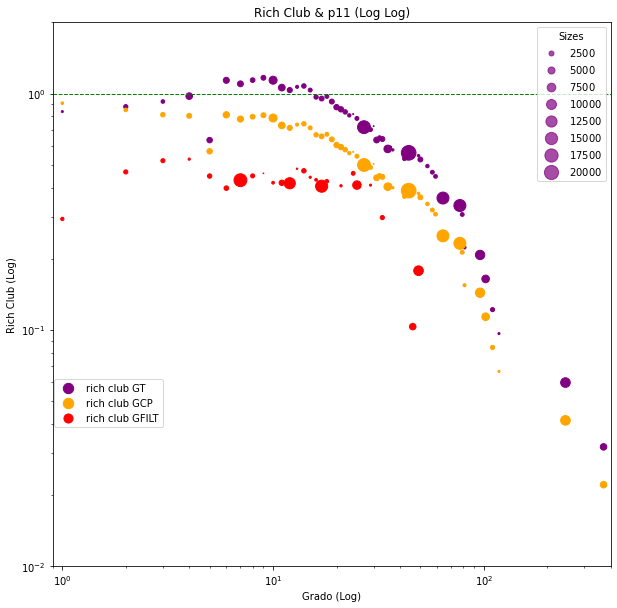

In [149]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(degrees_gt_grouped1,rc_gt_grouped1, s=np.array(size_gt_grouped1_p11)/100, color='purple',label='rich club GT')
ax.scatter(degrees_gcp_grouped1,rc_gcp_grouped1, s=np.array(size_gcp_grouped1_p11)/100, color='orange',label='rich club GCP')
ax.scatter(degrees_gfilt_grouped1,rc_gfilt_grouped1, s=np.array(size_gfilt_grouped1_p11)/100, color='red',label='rich club GFILT')
ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: 100*x, color='purple')

plt.title("Rich Club & p11 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)
plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

coef_pearson = pearsonr(degrees_gt_grouped1, size_gt_grouped1_p11)[0]

print(f'El coef. de correlaciòn es de: {coef_pearson}')

El coef. de correlaciòn es de: 0.1397106152814219


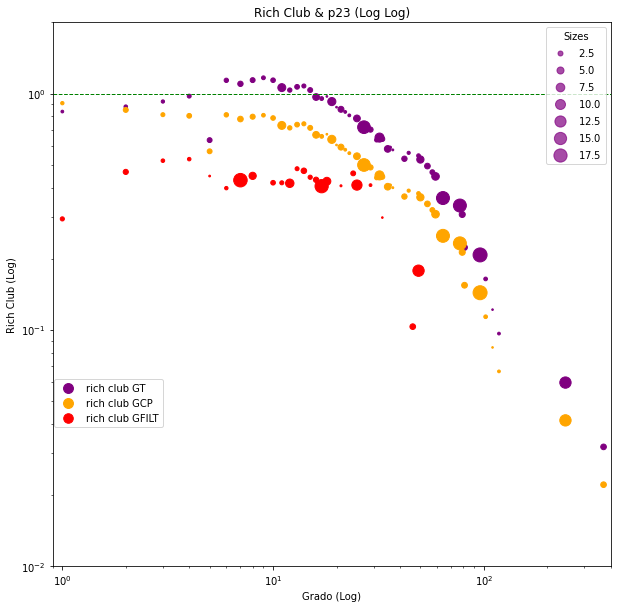

In [150]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(degrees_gt_grouped1,rc_gt_grouped1, s=10*np.array(size_gt_grouped1_p23), color='purple',label='rich club GT')
ax.scatter(degrees_gcp_grouped1,rc_gcp_grouped1, s=10*np.array(size_gcp_grouped1_p23), color='orange',label='rich club GCP')
ax.scatter(degrees_gfilt_grouped1,rc_gfilt_grouped1, s=10*np.array(size_gfilt_grouped1_p23), color='red',label='rich club GFILT')
ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/10, color='purple')

plt.title("Rich Club & p23 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)
plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

coef_pearson = pearsonr(rc_gt_grouped1[:-1], size_gt_grouped1_p23[:-1])[0]

print(f'El coef. de correlaciòn es de: {coef_pearson}')

El coef. de correlaciòn es de: -0.32062801844365246


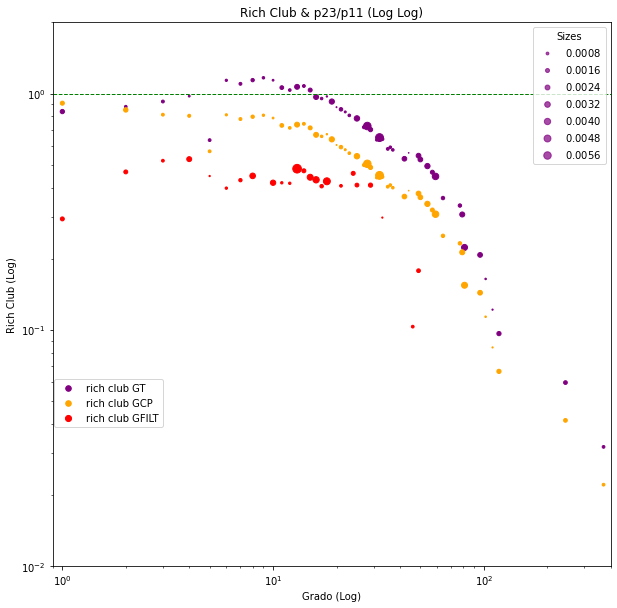

In [151]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(degrees_gt_grouped1,rc_gt_grouped1, s=10000*np.array(size_gt_grouped1_p23)/np.array(size_gt_grouped1_p11), color='purple',label='rich club GT')
ax.scatter(degrees_gcp_grouped1,rc_gcp_grouped1, s=10000*np.array(size_gcp_grouped1_p23)/np.array(size_gcp_grouped1_p11), color='orange',label='rich club GCP')
ax.scatter(degrees_gfilt_grouped1,rc_gfilt_grouped1, s=10000*np.array(size_gfilt_grouped1_p23)/np.array(size_gfilt_grouped1_p11), color='red',label='rich club GFILT')
ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/10000, color='purple')

plt.title("Rich Club & p23/p11 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)
plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)
plt.show()

In [ ]:
size_gt_grouped1_p26 = np.array(size_gt_grouped1_p26a) + np.array(size_gt_grouped1_p26c) + np.array(size_gt_grouped1_p26e)
size_gcp_grouped1_p26 = np.array(size_gcp_grouped1_p26a) + np.array(size_gcp_grouped1_p26c) + np.array(size_gcp_grouped1_p26e)
size_gfilt_grouped1_p26 = np.array(size_gfilt_grouped1_p26a) + np.array(size_gfilt_grouped1_p26c) + np.array(size_gfilt_grouped1_p26e)

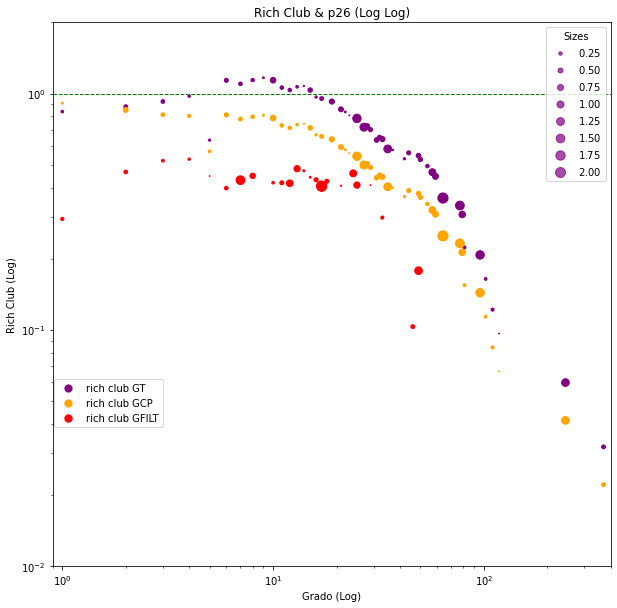

In [152]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(degrees_gt_grouped1,rc_gt_grouped1, s=50*np.array(size_gt_grouped1_p26), color='purple',label='rich club GT')
ax.scatter(degrees_gcp_grouped1,rc_gcp_grouped1, s=50*np.array(size_gcp_grouped1_p26), color='orange',label='rich club GCP')
ax.scatter(degrees_gfilt_grouped1,rc_gfilt_grouped1, s=50*np.array(size_gfilt_grouped1_p26), color='red',label='rich club GFILT')
ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/50, color='purple')

plt.title("Rich Club & p26 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)
plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

coef_pearson = pearsonr(rc_gt_grouped1[:-1], size_gt_grouped1_p26c[:-1])[0]
print(f'El coef. de correlaciòn es de: {coef_pearson}')

El coef. de correlaciòn es de: -0.3110200483237459


In [ ]:
size_gt_grouped1_p28 = np.array(size_gt_grouped1_p28a) + np.array(size_gt_grouped1_p28c) + np.array(size_gt_grouped1_p28e)
size_gcp_grouped1_p28 = np.array(size_gcp_grouped1_p28a) + np.array(size_gcp_grouped1_p28c) + np.array(size_gcp_grouped1_p28e)
size_gfilt_grouped1_p28 = np.array(size_gfilt_grouped1_p28a) + np.array(size_gfilt_grouped1_p28c) + np.array(size_gfilt_grouped1_p28e)

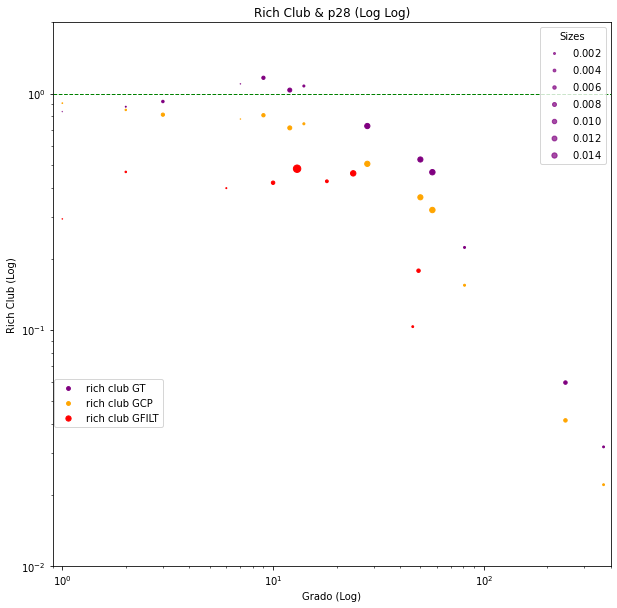

In [153]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(degrees_gt_grouped1,rc_gt_grouped1, s=2000*np.array(size_gt_grouped1_p28), color='purple',label='rich club GT')
ax.scatter(degrees_gcp_grouped1,rc_gcp_grouped1, s=2000*np.array(size_gcp_grouped1_p28), color='orange',label='rich club GCP')
ax.scatter(degrees_gfilt_grouped1,rc_gfilt_grouped1, s=2000*np.array(size_gfilt_grouped1_p28), color='red',label='rich club GFILT')
ax.axhline(y=1, color='g', linestyle='--',lw=1)

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/2000, color='purple')

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Rich Club & p28 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.1,0.3), loc="center", borderaxespad=1)
plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)
plt.show()

<h3>Generaciòn del grafo y bùsqueda del neighboorhood</h3>

In [ ]:
df_mainf = pd.read_excel('movilizaciones_2009_2019.xlsx')

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite, average_clustering

In [ ]:
B = nx.Graph()

In [ ]:
top_nodes = [f"o{x}" for x in range(10748)]
bottom_nodes = [x for x in range(23398)]

In [ ]:
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

In [ ]:
func1 = lambda x: "o"+str(x)
df_mainf['id_organizacion'] = df_mainf['id_organizacion'].apply(func1)
relations = list(df_mainf[['id_organizacion','id_manifestacion']].apply(tuple, axis=1))
B.add_edges_from(relations)

In [ ]:
G = bipartite.generic_weighted_projected_graph(B, top_nodes)

In [ ]:
Gcc = max(nx.connected_components(G), key=len)
giant_C = G.subgraph(Gcc)

In [ ]:
def fgh(x):
  setunion = set()
  for j in x:
    setunion = setunion.union(set([s for s in G.neighbors(j)]))
  return list(setunion)

In [ ]:
def fgh_gcp(x):
  setunion = set()
  for j in x:
    setunion = setunion.union(set([s for s in giant_C.neighbors(j)]))
  return list(setunion)

In [130]:
def fgh_gfilt(x):
  setunion = set()
  for j in x:
    setunion = setunion.union(set([s for s in B_filtered.neighbors(j)]))
  return list(setunion)

In [ ]:
df_rc_quality_gt_groupedneighboor = df_rc_quality_gt.groupby('degree')['organization'].apply(list).reset_index(name='groups')

In [ ]:
df_rc_quality_gcp_groupedneighboor = df_rc_quality_gcp.groupby('degree')['organization'].apply(list).reset_index(name='groups')

In [131]:
df_rc_quality_gfilt_groupedneighboor = df_rc_quality_gfilt.groupby('degree')['organization'].apply(list).reset_index(name='groups')

In [ ]:
df_rc_quality_gt

,organization,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,name,degree,rich_club,rich_club_norm
0,o7003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,A.S.S.,4,0.003884,0.974938
1,o6382,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ACADEMIA NACIONAL DE LA LENGUA MAPUCHE,4,0.003884,0.974938
2,o3984,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ACCIÓN FEMINISTA FLUOR,4,0.003884,0.974938
3,o6232,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,AFDD - TALCA,4,0.003884,0.974938
4,o489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,AFUCOM,4,0.003884,0.974938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,o15,1458.525424,3.677966,0.118644,0.525424,0.203390,0.000000,0.0,0.0,PC,79,0.709091,0.307612
10744,o290,2469.800000,2.350000,0.050000,0.500000,0.000000,0.000000,0.0,0.0,PPD,33,0.452991,0.641657
10745,o215,2406.460526,5.302632,0.026316,0.328947,0.013158,0.013158,0.0,0.0,PROFESORES,50,0.647059,0.525672
10746,o198,629.181818,1.409091,0.000000,0.318182,0.113636,0.000000,0.0,0.0,PS,49,0.625731,0.545605


In [ ]:
df_rc_quality_gt_groupedneighboor["neighboor"] = df_rc_quality_gt_groupedneighboor["groups"].apply(fgh)

In [ ]:
df_rc_quality_gcp_groupedneighboor["neighboor"] = df_rc_quality_gcp_groupedneighboor["groups"].apply(fgh_gcp)

In [132]:
df_rc_quality_gfilt_groupedneighboor["neighboor"] = df_rc_quality_gfilt_groupedneighboor["groups"].apply(fgh_gfilt)

In [ ]:
def mean_neighboor_gt(x, req_column):
  return df_rc_quality_gt[df_rc_quality_gt['organization'].isin(x)][req_column].mean()

In [ ]:
def mean_neighboor_gcp(x, req_column):
  return df_rc_quality_gcp[df_rc_quality_gcp['organization'].isin(x)][req_column].mean()

In [133]:
def mean_neighboor_gfilt(x, req_column):
  return df_rc_quality_gfilt[df_rc_quality_gfilt['organization'].isin(x)][req_column].mean()

In [ ]:
df_rc_quality_gt_groupedneighboor["mean_p11_neighboor_gt"] = df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p11"))
df_rc_quality_gt_groupedneighboor["mean_p23_neighboor_gt"] = df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p23"))

In [ ]:
df_rc_quality_gcp_groupedneighboor["mean_p11_neighboor_gcp"] = df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p11"))
df_rc_quality_gcp_groupedneighboor["mean_p23_neighboor_gcp"] = df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p23"))

In [134]:
df_rc_quality_gfilt_groupedneighboor["mean_p11_neighboor_gfilt"] = df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p11"))
df_rc_quality_gfilt_groupedneighboor["mean_p23_neighboor_gfilt"] = df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p23"))

In [ ]:
df_rc_quality_gt_groupedneighboor

,degree,groups,neighboor,mean_p11_neighboor_gt,mean_p23_neighboor_gt,mean_p26_neighboor_gt,mean_p28_neighboor_gt
0,0,"[o9060, o8499, o4300, o8502, o9285, o4764, o80...",[],NaN,NaN,NaN,NaN
1,1,"[o10653, o10618, o10398, o10054, o10501, o7835...","[o4796, o3976, o982, o6050, o5004, o4412, o441...",574.319652,0.830298,0.163960,0.000422
2,2,"[o8296, o8508, o5216, o6473, o2309, o6793, o30...","[o3152, o3148, o3282, o1096, o9273, o9120, o16...",1700.730852,1.094862,0.247578,0.000321
3,3,"[o7257, o5874, o8649, o3456, o7066, o1169, o10...","[o2017, o9463, o2648, o3523, o10603, o2840, o1...",2563.853747,1.069714,0.239085,0.002526
4,4,"[o7003, o6382, o3984, o6232, o489, o4266, o885...","[o4678, o5524, o597, o9203, o7245, o5471, o101...",4914.719065,1.805986,0.153356,0.000597
5,5,"[o3106, o4718, o6442, o10309, o3506, o4285, o8...","[o1640, o3148, o3282, o10144, o10091, o1660, o...",2762.057579,1.987311,0.132310,0.000261
6,6,"[o2339, o8121, o10066, o659, o7232, o3174, o52...","[o10318, o3282, o5274, o1414, o8759, o10523, o...",2995.922940,3.892155,0.408770,0.000200
7,7,"[o363, o1102, o4726, o8934, o3011, o5130, o886...","[o10318, o433, o5040, o1632, o139, o3088, o461...",3779.630735,2.160110,0.488747,0.000584
8,8,"[o14, o70, o5941, o3970, o3222, o833, o589, o1...","[o7985, o7628, o1499, o5639, o10032, o10603, o...",2325.147844,2.748746,0.200303,0.001552
9,9,"[o2700, o7106, o445, o4271, o345, o380, o7177,...","[o5126, o6287, o1485, o7108, o294, o4008, o894...",3288.868598,1.888569,0.124300,0.002823


In [ ]:
 df_rc_quality_gt_grouped1['degree'] = df_rc_quality_gt_grouped1.index

In [ ]:
df_rc_quality_gt_grouped1 = df_rc_quality_gt_grouped1.drop(columns="degree")

In [ ]:
df_rc_gt_p11neighboor = pd.merge(df_rc_quality_gt_grouped1,df_rc_quality_gt_groupedneighboor[["mean_p11_neighboor_gt","degree"]], on="degree" )

In [ ]:
df_rc_gcp_p11neighboor = pd.merge(df_rc_quality_gcp_grouped1,df_rc_quality_gcp_groupedneighboor[["mean_p11_neighboor_gcp","degree"]], on="degree" )

In [135]:
df_rc_gfilt_p11neighboor = pd.merge(df_rc_quality_gfilt_grouped1,df_rc_quality_gfilt_groupedneighboor[["mean_p11_neighboor_gfilt","degree"]], on="degree" )

In [ ]:
df_rc_gt_p11neighboor.head()

,degree,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,rich_club,rich_club_norm,mean_p11_neighboor_gt
0,0,115.423469,0.543438,0.028928,0.025112,0.004088,0.000264,0.0,0.000353,0.000146,1.000092,NaN
1,1,410.812767,0.754284,0.100877,0.039815,0.004571,0.000069,0.0,0.000000,0.000550,0.838725,574.319652
2,2,1807.084547,1.298297,0.121233,0.168209,0.018921,0.000480,0.0,0.000000,0.001266,0.879391,1700.730852
3,3,1318.489436,1.096386,0.175460,0.065949,0.034669,0.000000,0.0,0.003082,0.002303,0.925083,2563.853747
4,4,4376.119575,1.551681,0.026781,0.103230,0.003035,0.000000,0.0,0.000000,0.003884,0.974938,4914.719065


In [ ]:
df_rc_gcp_p11neighboor.head()

,degree,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,rich_club,rich_club_norm,mean_p11_neighboor_gt
0,1,674.563281,1.118946,0.034825,0.036011,0.007590,0.000271,0.0,0.000000,0.001972,0.910227,2155.079476
1,2,1261.256876,2.474309,0.198970,0.248413,0.035099,0.001082,0.0,0.000000,0.002817,0.852274,1271.574770
2,3,1998.115968,1.599473,0.117202,0.112044,0.058246,0.000000,0.0,0.005236,0.004101,0.813712,1903.674799
3,4,2458.387762,2.268702,0.038662,0.148637,0.004682,0.000000,0.0,0.000000,0.006280,0.804753,1768.466259
4,5,2938.051275,2.374355,0.028328,0.116729,0.012634,0.000000,0.0,0.000000,0.006711,0.569397,2743.597227


In [136]:
aaaaa_1_gt = df_rc_gt_p11neighboor[["degree","rich_club_norm","p11","mean_p11_neighboor_gt"]].query('p11 >=mean_p11_neighboor_gt')
aaaaa_2_gt = df_rc_gt_p11neighboor[["degree","rich_club_norm","p11","mean_p11_neighboor_gt"]].query('p11 <mean_p11_neighboor_gt')

aaaaa_1_gcp = df_rc_gcp_p11neighboor[["degree","rich_club_norm","p11","mean_p11_neighboor_gcp"]].query('p11 >=mean_p11_neighboor_gcp')
aaaaa_2_gcp = df_rc_gcp_p11neighboor[["degree","rich_club_norm","p11","mean_p11_neighboor_gcp"]].query('p11 <mean_p11_neighboor_gcp')

aaaaa_1_gfilt = df_rc_gfilt_p11neighboor[["degree","rich_club_norm","p11","mean_p11_neighboor_gfilt"]].query('p11 >=mean_p11_neighboor_gfilt')
aaaaa_2_gfilt = df_rc_gfilt_p11neighboor[["degree","rich_club_norm","p11","mean_p11_neighboor_gfilt"]].query('p11 <mean_p11_neighboor_gfilt')

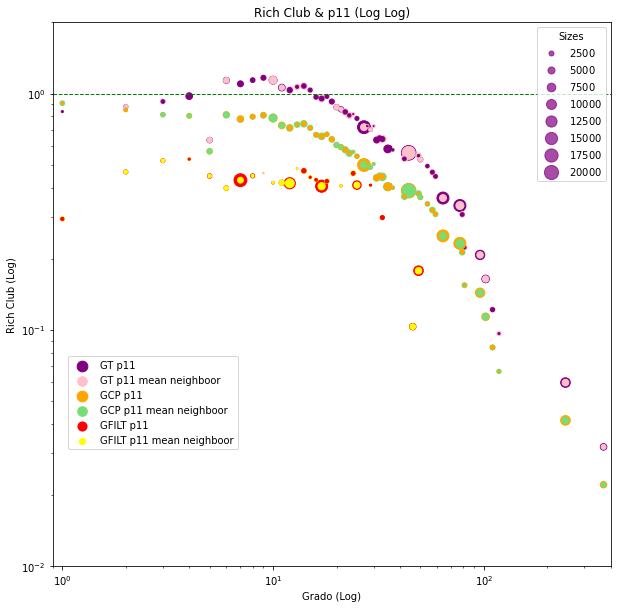

In [157]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(aaaaa_1_gt["degree"],aaaaa_1_gt["rich_club_norm"], s=aaaaa_1_gt["p11"]/100, color='purple', label='GT p11')
ax.scatter(aaaaa_1_gt["degree"],aaaaa_1_gt["rich_club_norm"], s=aaaaa_1_gt["mean_p11_neighboor_gt"]/100, color='pink',label ='GT p11 mean neighboor')

ax.scatter(aaaaa_2_gt["degree"],aaaaa_2_gt["rich_club_norm"], s=aaaaa_2_gt["mean_p11_neighboor_gt"]/100, color='pink',alpha=1)
ax.scatter(aaaaa_2_gt["degree"],aaaaa_2_gt["rich_club_norm"], s=aaaaa_2_gt["p11"]/100, color='purple')

ax.scatter(aaaaa_1_gcp["degree"],aaaaa_1_gcp["rich_club_norm"], s=aaaaa_1_gcp["p11"]/100, color='orange', label='GCP p11')
ax.scatter(aaaaa_1_gcp["degree"],aaaaa_1_gcp["rich_club_norm"], s=aaaaa_1_gcp["mean_p11_neighboor_gcp"]/100, color='#77DD77', label='GCP p11 mean neighboor')

ax.scatter(aaaaa_2_gcp["degree"],aaaaa_2_gcp["rich_club_norm"], s=aaaaa_2_gcp["mean_p11_neighboor_gcp"]/100, color='#77DD77',alpha=1)
ax.scatter(aaaaa_2_gcp["degree"],aaaaa_2_gcp["rich_club_norm"], s=aaaaa_2_gcp["p11"]/100, color='orange')


ax.scatter(aaaaa_1_gfilt["degree"],aaaaa_1_gfilt["rich_club_norm"], s=aaaaa_1_gfilt["p11"]/100, color='red', label='GFILT p11')
ax.scatter(aaaaa_1_gfilt["degree"],aaaaa_1_gfilt["rich_club_norm"], s=aaaaa_1_gfilt["mean_p11_neighboor_gfilt"]/100, color='yellow', label='GFILT p11 mean neighboor')

ax.scatter(aaaaa_2_gfilt["degree"],aaaaa_2_gfilt["rich_club_norm"], s=aaaaa_2_gfilt["mean_p11_neighboor_gfilt"]/100, color='yellow',alpha=1)
ax.scatter(aaaaa_2_gfilt["degree"],aaaaa_2_gfilt["rich_club_norm"], s=aaaaa_2_gfilt["p11"]/100, color='red')

ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: 100*x, color='purple')

plt.title("Rich Club & p11 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.18,0.3), loc="center", borderaxespad=1)

plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)
plt.show()

In [ ]:
df_rc_gt_p23neighboor = pd.merge(df_rc_quality_gt_grouped1,df_rc_quality_gt_groupedneighboor[["mean_p23_neighboor_gt","degree"]], on="degree" )

In [ ]:
df_rc_gcp_p23neighboor = pd.merge(df_rc_quality_gcp_grouped1,df_rc_quality_gcp_groupedneighboor[["mean_p23_neighboor_gcp","degree"]], on="degree" )

In [159]:
df_rc_gfilt_p23neighboor = pd.merge(df_rc_quality_gfilt_grouped1,df_rc_quality_gfilt_groupedneighboor[["mean_p23_neighboor_gfilt","degree"]], on="degree" )

In [ ]:
df_rc_gt_p23neighboor.head()

,degree,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,rich_club,rich_club_norm,mean_p23_neighboor_gt
0,0,115.423469,0.543438,0.028928,0.025112,0.004088,0.000264,0.0,0.000353,0.000146,1.000092,NaN
1,1,410.812767,0.754284,0.100877,0.039815,0.004571,0.000069,0.0,0.000000,0.000550,0.838725,0.830298
2,2,1807.084547,1.298297,0.121233,0.168209,0.018921,0.000480,0.0,0.000000,0.001266,0.879391,1.094862
3,3,1318.489436,1.096386,0.175460,0.065949,0.034669,0.000000,0.0,0.003082,0.002303,0.925083,1.069714
4,4,4376.119575,1.551681,0.026781,0.103230,0.003035,0.000000,0.0,0.000000,0.003884,0.974938,1.805986


In [160]:
bbbbb_1_gt = df_rc_gt_p23neighboor[["degree","rich_club_norm","p23","mean_p23_neighboor_gt"]].query('p23 >=mean_p23_neighboor_gt')
bbbbb_2_gt = df_rc_gt_p23neighboor[["degree","rich_club_norm","p23","mean_p23_neighboor_gt"]].query('p23 <mean_p23_neighboor_gt')

bbbbb_1_gcp = df_rc_gcp_p23neighboor[["degree","rich_club_norm","p23","mean_p23_neighboor_gcp"]].query('p23 >=mean_p23_neighboor_gcp')
bbbbb_2_gcp = df_rc_gcp_p23neighboor[["degree","rich_club_norm","p23","mean_p23_neighboor_gcp"]].query('p23 <mean_p23_neighboor_gcp')

bbbbb_1_gfilt = df_rc_gfilt_p23neighboor[["degree","rich_club_norm","p23","mean_p23_neighboor_gfilt"]].query('p23 >=mean_p23_neighboor_gfilt')
bbbbb_2_gfilt = df_rc_gfilt_p23neighboor[["degree","rich_club_norm","p23","mean_p23_neighboor_gfilt"]].query('p23 <mean_p23_neighboor_gfilt')

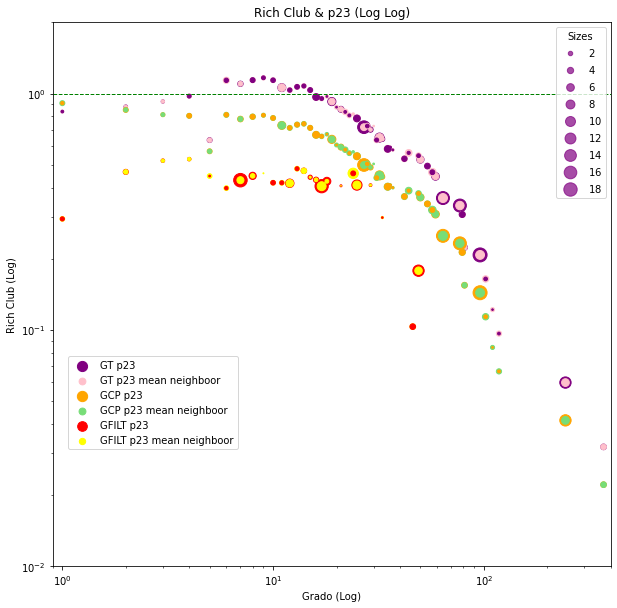

In [161]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(bbbbb_1_gt["degree"],bbbbb_1_gt["rich_club_norm"], s=10*bbbbb_1_gt["p23"], color='purple',label='GT p23')
ax.scatter(bbbbb_1_gt["degree"],bbbbb_1_gt["rich_club_norm"], s=10*bbbbb_1_gt["mean_p23_neighboor_gt"], color='pink',label='GT p23 mean neighboor')

ax.scatter(bbbbb_2_gt["degree"],bbbbb_2_gt["rich_club_norm"], s=10*bbbbb_2_gt["mean_p23_neighboor_gt"], color='pink',alpha=1)
ax.scatter(bbbbb_2_gt["degree"],bbbbb_2_gt["rich_club_norm"], s=10*bbbbb_2_gt["p23"], color='purple')


ax.scatter(bbbbb_1_gcp["degree"],bbbbb_1_gcp["rich_club_norm"], s=10*bbbbb_1_gcp["p23"], color='orange', label='GCP p23')
ax.scatter(bbbbb_1_gcp["degree"],bbbbb_1_gcp["rich_club_norm"], s=10*bbbbb_1_gcp["mean_p23_neighboor_gcp"], color='#77DD77', label='GCP p23 mean neighboor')

ax.scatter(bbbbb_2_gcp["degree"],bbbbb_2_gcp["rich_club_norm"], s=10*bbbbb_2_gcp["mean_p23_neighboor_gcp"], color='#77DD77',alpha=1)
ax.scatter(bbbbb_2_gcp["degree"],bbbbb_2_gcp["rich_club_norm"], s=10*bbbbb_2_gcp["p23"], color='orange')


ax.scatter(bbbbb_1_gfilt["degree"],bbbbb_1_gfilt["rich_club_norm"], s=10*bbbbb_1_gfilt["p23"], color='red',label='GFILT p23')
ax.scatter(bbbbb_1_gfilt["degree"],bbbbb_1_gfilt["rich_club_norm"], s=10*bbbbb_1_gfilt["mean_p23_neighboor_gfilt"], color='yellow',label='GFILT p23 mean neighboor')

ax.scatter(bbbbb_2_gfilt["degree"],bbbbb_2_gfilt["rich_club_norm"], s=10*bbbbb_2_gfilt["mean_p23_neighboor_gfilt"], color='yellow',alpha=1)
ax.scatter(bbbbb_2_gfilt["degree"],bbbbb_2_gfilt["rich_club_norm"], s=10*bbbbb_2_gfilt["p23"], color='red')

ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/10, color='purple')

plt.title("Rich Club & p23 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.18,0.3), loc="center", borderaxespad=1)

plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)
plt.gca().add_artist(legend_color)

plt.show()

In [ ]:
df_rc_quality_gt_groupedneighboor["mean_p26_neighboor_gt"] = df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p26a")) + df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p26c")) + df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p26e"))

In [ ]:
df_rc_quality_gcp_groupedneighboor["mean_p26_neighboor_gcp"] = df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p26a")) + df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p26c")) + df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p26e"))

In [162]:
df_rc_quality_gfilt_groupedneighboor["mean_p26_neighboor_gfilt"] = df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p26a")) + df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p26c")) + df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p26e"))

In [ ]:
df_rc_gt_p26neighboor = pd.merge(df_rc_quality_gt_grouped1,df_rc_quality_gt_groupedneighboor[["mean_p26_neighboor_gt","degree"]], on="degree" )

In [ ]:
df_rc_gcp_p26neighboor = pd.merge(df_rc_quality_gcp_grouped1,df_rc_quality_gcp_groupedneighboor[["mean_p26_neighboor_gcp","degree"]], on="degree" )

In [163]:
df_rc_gfilt_p26neighboor = pd.merge(df_rc_quality_gfilt_grouped1,df_rc_quality_gfilt_groupedneighboor[["mean_p26_neighboor_gfilt","degree"]], on="degree" )

In [ ]:
df_rc_gt_p26neighboor['p26'] = df_rc_gt_p26neighboor['p26a'] + df_rc_gt_p26neighboor['p26c'] + df_rc_gt_p26neighboor['p26e']

In [ ]:
df_rc_gcp_p26neighboor['p26'] = df_rc_gcp_p26neighboor['p26a'] + df_rc_gcp_p26neighboor['p26c'] + df_rc_gcp_p26neighboor['p26e']

In [164]:
df_rc_gfilt_p26neighboor['p26'] = df_rc_gfilt_p26neighboor['p26a'] + df_rc_gfilt_p26neighboor['p26c'] + df_rc_gfilt_p26neighboor['p26e']

In [ ]:
df_rc_gt_p26neighboor.head()

,degree,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,rich_club,rich_club_norm,mean_p26_neighboor_gt,p26
0,0,115.423469,0.543438,0.028928,0.025112,0.004088,0.000264,0.0,0.000353,0.000146,1.000092,NaN,0.058127
1,1,410.812767,0.754284,0.100877,0.039815,0.004571,0.000069,0.0,0.000000,0.000550,0.838725,0.163960,0.145263
2,2,1807.084547,1.298297,0.121233,0.168209,0.018921,0.000480,0.0,0.000000,0.001266,0.879391,0.247578,0.308363
3,3,1318.489436,1.096386,0.175460,0.065949,0.034669,0.000000,0.0,0.003082,0.002303,0.925083,0.239085,0.276078
4,4,4376.119575,1.551681,0.026781,0.103230,0.003035,0.000000,0.0,0.000000,0.003884,0.974938,0.153356,0.133046


In [165]:
ccccc_1_gt = df_rc_gt_p26neighboor[["degree","rich_club_norm","p26","mean_p26_neighboor_gt"]].query('p26 >=mean_p26_neighboor_gt')
ccccc_2_gt = df_rc_gt_p26neighboor[["degree","rich_club_norm","p26","mean_p26_neighboor_gt"]].query('p26 <mean_p26_neighboor_gt')

ccccc_1_gcp = df_rc_gcp_p26neighboor[["degree","rich_club_norm","p26","mean_p26_neighboor_gcp"]].query('p26 >=mean_p26_neighboor_gcp')
ccccc_2_gcp = df_rc_gcp_p26neighboor[["degree","rich_club_norm","p26","mean_p26_neighboor_gcp"]].query('p26 <mean_p26_neighboor_gcp')


ccccc_1_gfilt = df_rc_gfilt_p26neighboor[["degree","rich_club_norm","p26","mean_p26_neighboor_gfilt"]].query('p26 >=mean_p26_neighboor_gfilt')
ccccc_2_gfilt = df_rc_gfilt_p26neighboor[["degree","rich_club_norm","p26","mean_p26_neighboor_gfilt"]].query('p26 <mean_p26_neighboor_gfilt')

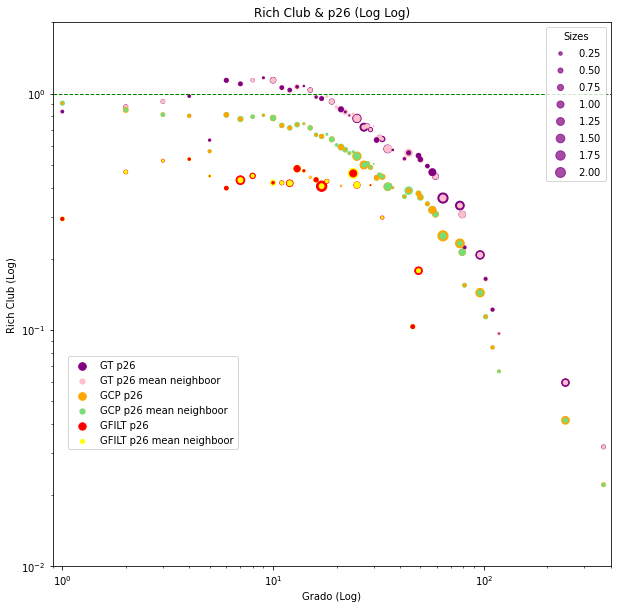

In [166]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(ccccc_1_gt["degree"],ccccc_1_gt["rich_club_norm"], s=50*ccccc_1_gt["p26"], color='purple', label='GT p26')
ax.scatter(ccccc_1_gt["degree"],ccccc_1_gt["rich_club_norm"], s=50*ccccc_1_gt["mean_p26_neighboor_gt"], color='pink', label='GT p26 mean neighboor')

ax.scatter(ccccc_2_gt["degree"],ccccc_2_gt["rich_club_norm"], s=50*ccccc_2_gt["mean_p26_neighboor_gt"], color='pink',alpha=1)
ax.scatter(ccccc_2_gt["degree"],ccccc_2_gt["rich_club_norm"], s=50*ccccc_2_gt["p26"], color='purple')

ax.scatter(ccccc_1_gcp["degree"],ccccc_1_gcp["rich_club_norm"], s=50*ccccc_1_gcp["p26"], color='orange', label='GCP p26')
ax.scatter(ccccc_1_gcp["degree"],ccccc_1_gcp["rich_club_norm"], s=50*ccccc_1_gcp["mean_p26_neighboor_gcp"], color='#77DD77', label='GCP p26 mean neighboor')

ax.scatter(ccccc_2_gcp["degree"],ccccc_2_gcp["rich_club_norm"], s=50*ccccc_2_gcp["mean_p26_neighboor_gcp"], color='#77DD77',alpha=1)
ax.scatter(ccccc_2_gcp["degree"],ccccc_2_gcp["rich_club_norm"], s=50*ccccc_2_gcp["p26"], color='orange')


ax.scatter(ccccc_1_gfilt["degree"],ccccc_1_gfilt["rich_club_norm"], s=50*ccccc_1_gfilt["p26"], color='red',label='GFILT p26')
ax.scatter(ccccc_1_gfilt["degree"],ccccc_1_gfilt["rich_club_norm"], s=50*ccccc_1_gfilt["mean_p26_neighboor_gfilt"], color='yellow',label='GFILT p26 mean neighboor')

ax.scatter(ccccc_2_gfilt["degree"],ccccc_2_gfilt["rich_club_norm"], s=50*ccccc_2_gfilt["mean_p26_neighboor_gfilt"], color='yellow',alpha=1)
ax.scatter(ccccc_2_gfilt["degree"],ccccc_2_gfilt["rich_club_norm"], s=50*ccccc_2_gfilt["p26"], color='red')


ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/50, color='purple')

plt.title("Rich Club & p26 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.18,0.3), loc="center", borderaxespad=1)

plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)
plt.gca().add_artist(legend_color)

plt.show()

In [ ]:
df_rc_quality_gt_groupedneighboor["mean_p28_neighboor_gt"] = df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p28a")) + df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p28c")) + df_rc_quality_gt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gt(x, "p28e"))

In [ ]:
df_rc_quality_gcp_groupedneighboor["mean_p28_neighboor_gcp"] = df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p28a")) + df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p28c")) + df_rc_quality_gcp_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gcp(x, "p28e"))

In [167]:
df_rc_quality_gfilt_groupedneighboor["mean_p28_neighboor_gfilt"] = df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p28a")) + df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p28c")) + df_rc_quality_gfilt_groupedneighboor["neighboor"].apply(lambda x: mean_neighboor_gfilt(x, "p28e"))

In [ ]:
df_rc_gt_p28neighboor = pd.merge(df_rc_quality_gt_grouped1,df_rc_quality_gt_groupedneighboor[["mean_p28_neighboor_gt","degree"]], on="degree" )

In [ ]:
df_rc_gcp_p28neighboor = pd.merge(df_rc_quality_gcp_grouped1,df_rc_quality_gcp_groupedneighboor[["mean_p28_neighboor_gcp","degree"]], on="degree" )

In [168]:
df_rc_gfilt_p28neighboor = pd.merge(df_rc_quality_gfilt_grouped1,df_rc_quality_gfilt_groupedneighboor[["mean_p28_neighboor_gfilt","degree"]], on="degree" )

In [ ]:
df_rc_gt_p28neighboor['p28'] = df_rc_gt_p28neighboor['p28a'] + df_rc_gt_p26neighboor['p28c'] + df_rc_gt_p26neighboor['p28e']

In [ ]:
df_rc_gcp_p28neighboor['p28'] = df_rc_gcp_p28neighboor['p28a'] + df_rc_gcp_p26neighboor['p28c'] + df_rc_gcp_p26neighboor['p28e']

In [169]:
df_rc_gfilt_p28neighboor['p28'] = df_rc_gfilt_p28neighboor['p28a'] + df_rc_gfilt_p26neighboor['p28c'] + df_rc_gfilt_p26neighboor['p28e']

In [ ]:
df_rc_gt_p28neighboor.head()

,degree,p11,p23,p26a,p26c,p26e,p28a,p28c,p28e,rich_club,rich_club_norm,mean_p28_neighboor_gt,p28
0,0,115.423469,0.543438,0.028928,0.025112,0.004088,0.000264,0.0,0.000353,0.000146,1.000092,NaN,0.000617
1,1,410.812767,0.754284,0.100877,0.039815,0.004571,0.000069,0.0,0.000000,0.000550,0.838725,0.000422,0.000069
2,2,1807.084547,1.298297,0.121233,0.168209,0.018921,0.000480,0.0,0.000000,0.001266,0.879391,0.000321,0.000480
3,3,1318.489436,1.096386,0.175460,0.065949,0.034669,0.000000,0.0,0.003082,0.002303,0.925083,0.002526,0.003082
4,4,4376.119575,1.551681,0.026781,0.103230,0.003035,0.000000,0.0,0.000000,0.003884,0.974938,0.000597,0.000000


In [170]:
ddddd_1_gt = df_rc_gt_p28neighboor[["degree","rich_club_norm","p28","mean_p28_neighboor_gt"]].query('p28 >=mean_p28_neighboor_gt')
ddddd_2_gt = df_rc_gt_p28neighboor[["degree","rich_club_norm","p28","mean_p28_neighboor_gt"]].query('p28 <mean_p28_neighboor_gt')

ddddd_1_gcp = df_rc_gcp_p28neighboor[["degree","rich_club_norm","p28","mean_p28_neighboor_gcp"]].query('p28 >=mean_p28_neighboor_gcp')
ddddd_2_gcp = df_rc_gcp_p28neighboor[["degree","rich_club_norm","p28","mean_p28_neighboor_gcp"]].query('p28 <mean_p28_neighboor_gcp')

ddddd_1_gfilt = df_rc_gfilt_p28neighboor[["degree","rich_club_norm","p28","mean_p28_neighboor_gfilt"]].query('p28 >=mean_p28_neighboor_gfilt')
ddddd_2_gfilt = df_rc_gfilt_p28neighboor[["degree","rich_club_norm","p28","mean_p28_neighboor_gfilt"]].query('p28 <mean_p28_neighboor_gfilt')

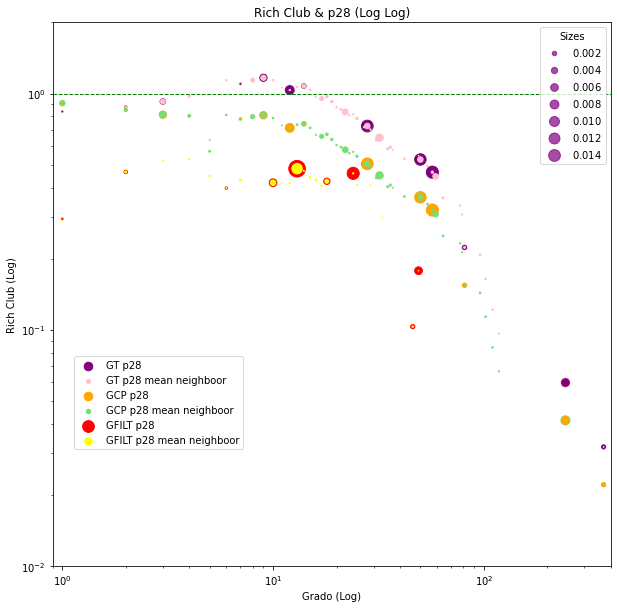

In [172]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
scatter1 = ax.scatter(ddddd_1_gt["degree"],ddddd_1_gt["rich_club_norm"], s=10000*ddddd_1_gt["p28"], color='purple', label='GT p28')
ax.scatter(ddddd_1_gt["degree"],ddddd_1_gt["rich_club_norm"], s=10000*ddddd_1_gt["mean_p28_neighboor_gt"], color='pink', label='GT p28 mean neighboor')

ax.scatter(ddddd_2_gt["degree"],ddddd_2_gt["rich_club_norm"], s=10000*ddddd_2_gt["mean_p28_neighboor_gt"], color='pink',alpha=1)
ax.scatter(ddddd_2_gt["degree"],ddddd_2_gt["rich_club_norm"], s=10000*ddddd_2_gt["p28"], color='purple')

ax.scatter(ddddd_1_gcp["degree"],ddddd_1_gcp["rich_club_norm"], s=10000*ddddd_1_gcp["p28"], color='orange',label='GCP p28')
ax.scatter(ddddd_1_gcp["degree"],ddddd_1_gcp["rich_club_norm"], s=10000*ddddd_1_gcp["mean_p28_neighboor_gcp"], color='#77DD77',label='GCP p28 mean neighboor')

ax.scatter(ddddd_2_gcp["degree"],ddddd_2_gcp["rich_club_norm"], s=10000*ddddd_2_gcp["mean_p28_neighboor_gcp"], color='#77DD77',alpha=1)
ax.scatter(ddddd_2_gcp["degree"],ddddd_2_gcp["rich_club_norm"], s=10000*ddddd_2_gcp["p28"], color='orange')


ax.scatter(ddddd_1_gfilt["degree"],ddddd_1_gfilt["rich_club_norm"], s=10000*ddddd_1_gfilt["p28"], color='red',label='GFILT p28')
ax.scatter(ddddd_1_gfilt["degree"],ddddd_1_gfilt["rich_club_norm"], s=10000*ddddd_1_gfilt["mean_p28_neighboor_gfilt"], color='yellow',label='GFILT p28 mean neighboor')

ax.scatter(ddddd_2_gfilt["degree"],ddddd_2_gfilt["rich_club_norm"], s=10000*ddddd_2_gfilt["mean_p28_neighboor_gfilt"], color='yellow',alpha=1)
ax.scatter(ddddd_2_gfilt["degree"],ddddd_2_gfilt["rich_club_norm"], s=10000*ddddd_2_gfilt["p28"], color='red')

ax.axhline(y=1, color='g', linestyle='--',lw=1)

ax.set_yscale("log")
ax.set_xscale("log")

handles, labels = scatter1.legend_elements(prop="sizes", alpha=0.7, func = lambda x: x/10000, color='purple')

plt.title("Rich Club & p28 (Log Log)")
plt.xlabel("Grado (Log)")
plt.ylabel("Rich Club (Log)")
legend_color = plt.legend(bbox_to_anchor=(0.19,0.3), loc="center", borderaxespad=1)

plt.legend(handles, labels, loc="upper right", title="Sizes")
plt.ylim(bottom=0.01, top=2)
plt.xlim(0.9, 400)

plt.gca().add_artist(legend_color)

plt.show()